In [2]:
import pathlib
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import torch

torch.cuda.is_available()

True

In [4]:
from autorocks.data.loader.all_models_result_aggregator import create_all_models_comparison_dataset
from autorocks.dir_struct import PackageRootDir
from sysgym.envs.rocksdb import schema

param_space = schema.RocksDB10Params()

all_model_df = create_all_models_comparison_dataset(
    PackageRootDir / "ProcessedDataNew/rocksdb/iops/zippy_workload_15min/10_params/50_iter", save_results=False)

/home/salabed/workspace/autorocks/autorocks/data/loader/exp_dao.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.sys_observations[col_name] = col_val
/home/salabed/workspace/autorocks/autorocks/data/loader/all_models_result_aggregator.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(model_data.sys_params, ignore_index=True)
/home/salabed/workspace/autorocks/autorocks/data/loader/all_models_result_aggregator.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_perf = model_perf.append(model_data.model_performance, ignore_index=True)
/home

In [5]:
import pandas as pd
import regex as re

combined_df = pd.merge(all_model_df.sys_params, all_model_df.sys_observations, on=["model", "iteration", "step"]).drop(
    columns=["model", "iteration", "step", "db_bench.mixgraph.name"])
combined_df.rename(columns=lambda x: re.sub(r'^db_bench\.mixgraph\.', '', x), inplace=True)
combined_df.rename(columns=lambda x: re.sub('rocksdb[\_]?', '', x), inplace=True)
combined_df.rename(columns=lambda x: re.sub(r'_statistics', '', x), inplace=True)
combined_df.rename(columns=lambda x: re.sub(r'_stats', '', x), inplace=True)
combined_df.rename(columns=lambda x: re.sub(r'^statistics.', '', x), inplace=True)
combined_df

,max_background_compactions,max_background_flushes,write_buffer_size,max_write_buffer_number,min_write_buffer_number_to_merge,max_bytes_for_level_multiplier,block_size,level0_file_num_compaction_trigger,level0_slowdown_writes_trigger,level0_stop_writes_trigger,...,cpu_usage.p100,cpu_usage.count,cpu_usage.sum,mem_usage.name,mem_usage.p50,mem_usage.p95,mem_usage.p99,mem_usage.p100,mem_usage.count,mem_usage.sum
0,154,6,25583963,16,22,7.071408,430913,30,646,31,...,107.5,90,8397.4,mem_usage,0.450180,0.519665,0.519665,0.519665,90,37.931385
1,72,3,29858923,2,5,5.869691,368029,5,525,230,...,103.4,90,7562.0,mem_usage,0.395880,0.453498,0.454830,0.454830,90,34.711170
2,214,4,35550988,21,29,11.865346,483343,10,556,698,...,100.0,90,8869.5,mem_usage,0.535667,0.705914,0.718183,0.721096,90,45.135750
3,113,6,62248535,20,14,7.908903,10359,8,926,430,...,100.1,90,8868.2,mem_usage,0.641479,0.849507,0.864744,0.868553,90,53.885429
4,129,5,16385055,11,13,10.681709,238208,52,563,375,...,103.6,90,6297.6,mem_usage,0.355343,0.404423,0.404478,0.404926,90,30.268112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,174,4,37466346,123,19,6.807059,97078,25,87,375,...,112.9,90,8880.9,mem_usage,0.543461,0.717233,0.730835,0.740463,90,45.783016
620,41,4,19346230,10,30,7.847812,386514,42,41,647,...,103.8,90,6127.0,mem_usage,0.367821,0.369583,0.369583,0.369583,90,29.557873
621,128,7,58907658,75,26,7.183811,336787,41,601,491,...,100.0,90,8867.2,mem_usage,0.632977,0.837250,0.852180,0.855541,90,53.190914
622,234,8,72614168,40,7,7.988892,344358,28,889,348,...,108.6,90,8652.5,mem_usage,0.565750,0.676937,0.676937,0.676937,90,48.170998


In [6]:
intermediate_col = set(combined_df.columns) - set(param_space) - {"iops", "exe_time", "cpu_usage.count",
                                                                  "cpu_usage.p100", "cpu_usage.p99",
                                                                  "cpu_usage.p95", "cpu_usage.p90", "cpu_usage.p50",
                                                                  "cpu_usage.sum",
                                                                  "mem_usage.count", "mem_usage.p100", "mem_usage.p99",
                                                                  "mem_usage.p95", "mem_usage.p90", "mem_usage.p50",
                                                                  "mem_usage.sum",
                                                                  }
intermediate_df = combined_df[list(intermediate_col)]
# Remove string
intermediate_df = intermediate_df[intermediate_df.T[intermediate_df.dtypes != object].index]
intermediate_df

,compaction.overall_compaction.interval_compaction.time_sec,compaction.overall_compaction.addfile_total_files.total,bytes_per_write.p95,blobdb_blob_file_sync_micros.count,blobdb_gc_bytes_overwritten.count,db_write_micros.p50,compact_read_bytes.count,block_cachecompressed_miss.count,l0_slowdown_count.count,sst_read_micros.count,...,numfiles_in_singlecompaction.count,compaction_range_del_drop_obsolete.count,memtable_compaction_count.sum,compaction.overall_compaction.addfile_l0_files.total,sst_read_micros.p50,blobdb_gc_num_files.count,read_block_get_micros.p95,compaction.overall_compaction.interval_compaction.read_size_mb,rate_limit_delay_millis.count,sst_batch_size.p95
0,0.8,0,186.514186,0,0,3.559901,0,0,0,304233,...,0,0,0,0,179.432605,0,527.391254,0.0,0,0.0
1,4.3,0,186.466398,0,0,3.204317,405691865,0,0,961113,...,14,0,0,0,148.743499,0,372.678619,470.0,0,0.0
2,0.0,0,186.460042,0,0,3.793996,0,0,0,7591,...,0,0,0,0,69.183343,0,147.638261,0.0,0,0.0
3,0.0,0,186.569808,0,0,3.916484,0,0,0,10633,...,0,0,0,0,68.066320,0,124.470032,0.0,0,0.0
4,0.4,0,186.463534,0,0,3.666555,0,0,0,1836763,...,0,0,0,0,147.255245,0,367.457759,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,1.3,0,186.499929,0,0,3.681676,0,0,0,8538,...,0,0,0,0,71.204507,0,173.511628,0.0,0,0.0
620,0.0,0,186.368767,0,0,3.641209,0,0,0,1639948,...,0,0,0,0,179.239266,0,530.721093,0.0,0,0.0
621,0.0,0,186.547413,0,0,3.833909,0,0,0,7619,...,0,0,0,0,70.211562,0,152.036036,0.0,0,0.0
622,0.9,0,186.477110,0,0,3.549798,0,0,0,257324,...,0,0,0,0,95.991579,0,204.134256,0.0,0,0.0


In [7]:
list(sorted(intermediate_df.columns))



['blobdb_blob_file_bytes_read.count',
 'blobdb_blob_file_bytes_written.count',
 'blobdb_blob_file_read_micros.count',
 'blobdb_blob_file_read_micros.p100',
 'blobdb_blob_file_read_micros.p50',
 'blobdb_blob_file_read_micros.p95',
 'blobdb_blob_file_read_micros.p99',
 'blobdb_blob_file_read_micros.sum',
 'blobdb_blob_file_sync_micros.count',
 'blobdb_blob_file_sync_micros.p100',
 'blobdb_blob_file_sync_micros.p50',
 'blobdb_blob_file_sync_micros.p95',
 'blobdb_blob_file_sync_micros.p99',
 'blobdb_blob_file_sync_micros.sum',
 'blobdb_blob_file_synced.count',
 'blobdb_blob_file_write_micros.count',
 'blobdb_blob_file_write_micros.p100',
 'blobdb_blob_file_write_micros.p50',
 'blobdb_blob_file_write_micros.p95',
 'blobdb_blob_file_write_micros.p99',
 'blobdb_blob_file_write_micros.sum',
 'blobdb_blob_index_evicted_count.count',
 'blobdb_blob_index_evicted_size.count',
 'blobdb_blob_index_expired_count.count',
 'blobdb_blob_index_expired_size.count',
 'blobdb_bytes_read.count',
 'blobdb_byt

In [8]:
# create test/training dataset, split to 100 train, the rest will be used to test

X_FULL = combined_df[list(param_space)]
Y_FULL = combined_df["iops"]

In [9]:
from autorocks.optimizer.bograph.bograph_dao import BoGraphDataPandas
import exp_util

data = BoGraphDataPandas(
    params=combined_df[list(param_space)].copy(),
    objs=combined_df["iops"].copy(),
    intermediate=intermediate_df.copy(),
)

preprocessing_comparison = []

strategies = [exp_util.Strategy.NO_COMPRESS,
              exp_util.Strategy.RANKER5,
              exp_util.Strategy.RANKER10,
              exp_util.Strategy.RANKER15,
              exp_util.Strategy.PCA]


2024-01-28 12:22:06,969 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/backend/__init__.py[line:36] - INFO: You can use `os.environ['CASTLE_BACKEND'] = backend` to set the backend(`pytorch` or `mindspore`).
2024-01-28 12:22:07,017 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/__init__.py[line:36] - INFO: You are using ``pytorch`` as the backend.


In [15]:
for restart in range(3):
    for strategy in strategies:
        exp_result = exp_util.perform_dag_compression_exp(strategy, data, set(param_space), {"iops"})
        preprocessing_comparison.append({"Restart": restart,
                                         "Strategy": strategy,
                                         "Likelihood": exp_result.likelihood,
                                         "Score": exp_result.score,
                                         "Runtime": exp_result.runtime,
                                         "MaxDim": exp_result.max_dim
                                         })

2024-01-28 13:08:21,268 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:120] - INFO: GPU is available.
2024-01-28 13:08:21,273 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:207] - INFO: Started training for 100000 iterations.
2024-01-28 13:08:21,275 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 0] score=180.354, likelihood=180.354, h=0.0e+00
2024-01-28 13:08:32,980 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 5000] score=160.342, likelihood=155.743, h=6.5e-02
2024-01-28 13:08:45,328 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 10000] score=159.064, likeliho

Done
Manually connecting param:  {'max_background_compactions', 'max_write_buffer_number', 'level0_stop_writes_trigger'}
group={'max_bytes_for_level_multiplier', 'level0_stop_writes_trigger', 'max_write_buffer_number', 'max_background_compactions', 'write_buffer_size'}
group={'read_block_get_micros.p95', 'bytes_decompressed.p95', 'sst_read_micros.p95', 'level0_slowdown_writes_trigger', 'max_background_flushes'}
group={'db_write_micros.p95', 'compaction.overall_compaction.cumulative_compaction.write_throughput', 'compaction_times_micros.p95', 'block_size', 'compaction.overall_compaction.cumulative_compaction.read_throughput', 'bytes_compressed.p95', 'db_seek_micros.p95', 'io_size', 'latency', 'min_write_buffer_number_to_merge'}
group={'compaction.overall_compaction.cumulative_compaction.write_throughput', 'compaction_times_micros.p95', 'block_size', 'compaction_outfile_sync_micros.p95', 'compaction.overall_compaction.cumulative_compaction.read_throughput', 'compaction_times_cpu_micros.a

2024-01-28 13:12:37,650 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:120] - INFO: GPU is available.
2024-01-28 13:12:37,654 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:207] - INFO: Started training for 100000 iterations.
2024-01-28 13:12:37,657 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 0] score=73.670, likelihood=73.670, h=0.0e+00
2024-01-28 13:12:47,872 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 5000] score=66.953, likelihood=65.037, h=5.2e-02
2024-01-28 13:12:58,400 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 10000] score=66.516, likelihood=64

Done
Manually connecting param:  {'min_write_buffer_number_to_merge'}
group={'level0_file_num_compaction_trigger', 'max_bytes_for_level_multiplier', 'min_write_buffer_number_to_merge', 'write_buffer_size'}
group={'compaction.overall_compaction.cumulative_compaction.write_size_mb', 'level0_stop_writes_trigger', 'block_size', 'level0_slowdown_writes_trigger', 'max_background_flushes', 'max_background_compactions'}
group={'max_write_buffer_number', 'io_size'}


2024-01-28 13:16:07,392 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:120] - INFO: GPU is available.
2024-01-28 13:16:07,395 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:207] - INFO: Started training for 100000 iterations.
2024-01-28 13:16:07,397 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 0] score=99.547, likelihood=99.547, h=0.0e+00
2024-01-28 13:16:18,360 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 5000] score=87.578, likelihood=85.052, h=5.1e-02
2024-01-28 13:16:29,844 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 10000] score=86.544, likelihood=83

Done
Manually connecting param:  {'level0_file_num_compaction_trigger', 'max_background_flushes'}
group={'level0_file_num_compaction_trigger', 'max_bytes_for_level_multiplier', 'max_background_flushes', 'max_background_compactions'}
group={'level0_stop_writes_trigger', 'compaction.overall_compaction.cumulative_compaction.write_throughput', 'compaction.overall_compaction.cumulative_compaction.read_throughput', 'block_size', 'compaction.overall_compaction.cumulative_compaction.read_size_mb', 'compaction.overall_compaction.cumulative_compaction.write_size_mb', 'min_write_buffer_number_to_merge'}
group={'max_write_buffer_number', 'level0_slowdown_writes_trigger', 'io_size'}
group={'level0_stop_writes_trigger', 'compaction.overall_compaction.cumulative_compaction.write_throughput', 'max_write_buffer_number', 'io_size', 'level0_slowdown_writes_trigger'}
group={'max_write_buffer_number', 'compaction_times_cpu_micros.avg', 'io_size', 'level0_slowdown_writes_trigger', 'write_buffer_size'}
group

2024-01-28 13:20:01,368 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:120] - INFO: GPU is available.
2024-01-28 13:20:01,371 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:207] - INFO: Started training for 100000 iterations.
2024-01-28 13:20:01,373 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 0] score=126.025, likelihood=126.025, h=0.0e+00
2024-01-28 13:20:12,445 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 5000] score=111.083, likelihood=108.177, h=5.2e-02
2024-01-28 13:20:23,756 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 10000] score=110.119, likeliho

Done
Manually connecting param:  {'level0_file_num_compaction_trigger', 'level0_slowdown_writes_trigger', 'max_background_flushes'}
group={'level0_file_num_compaction_trigger', 'max_bytes_for_level_multiplier', 'level0_slowdown_writes_trigger', 'max_background_flushes'}
group={'compaction_times_micros.p95', 'block_size', 'compaction.overall_compaction.cumulative_compaction.read_size_mb', 'compaction.overall_compaction.cumulative_compaction.write_size_mb', 'compaction.overall_compaction.cumulative_compaction.time_sec', 'latency', 'write_raw_block_micros.p95', 'write_buffer_size'}
group={'db_write_micros.p95', 'compaction_times_micros.p95', 'block_size', 'compaction.overall_compaction.cumulative_compaction.read_size_mb', 'compaction.overall_compaction.cumulative_compaction.write_size_mb', 'compaction.overall_compaction.cumulative_compaction.time_sec', 'latency', 'min_write_buffer_number_to_merge', 'write_raw_block_micros.p95'}
group={'level0_stop_writes_trigger', 'max_background_compacti

2024-01-28 13:23:56,914 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:120] - INFO: GPU is available.
2024-01-28 13:23:56,917 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:207] - INFO: Started training for 100000 iterations.
2024-01-28 13:23:56,920 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 0] score=160.313, likelihood=160.313, h=0.0e+00
2024-01-28 13:24:07,778 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 5000] score=147.078, likelihood=144.048, h=4.5e-02
2024-01-28 13:24:19,085 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 10000] score=146.208, likeliho

Done
Manually connecting param:  {'max_bytes_for_level_multiplier', 'level0_stop_writes_trigger', 'max_background_compactions', 'min_write_buffer_number_to_merge', 'max_background_flushes'}
group={'max_bytes_for_level_multiplier', 'level0_stop_writes_trigger', 'max_background_compactions', 'min_write_buffer_number_to_merge', 'max_background_flushes'}
group={'compaction_times_cpu_micros', 'io_size', 'read_block_get_micros', 'numfiles_in_singlecompaction', 'write_buffer_size', 'block_size'}
group={'compaction_outfile_sync_micros', 'read_block_get_micros', 'max_write_buffer_number', 'level0_slowdown_writes_trigger', 'bytes_decompressed', 'sst_read_micros'}
group={'compaction_times_cpu_micros', 'io_size', 'read_block_get_micros', 'level0_file_num_compaction_trigger', 'compaction_outfile_sync_micros', 'block_size'}
group={'compaction_times_cpu_micros', 'compaction_outfile_sync_micros', 'read_block_get_micros', 'level0_file_num_compaction_trigger', 'level0_slowdown_writes_trigger', 'sst_read

2024-01-28 13:27:50,579 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:120] - INFO: GPU is available.
2024-01-28 13:27:50,581 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:207] - INFO: Started training for 100000 iterations.
2024-01-28 13:27:50,583 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 0] score=180.354, likelihood=180.354, h=0.0e+00
2024-01-28 13:28:02,014 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 5000] score=160.342, likelihood=155.743, h=6.5e-02
2024-01-28 13:28:14,114 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 10000] score=159.064, likeliho

Done
Manually connecting param:  {'max_background_compactions', 'max_write_buffer_number', 'level0_stop_writes_trigger'}
group={'max_bytes_for_level_multiplier', 'level0_stop_writes_trigger', 'max_write_buffer_number', 'max_background_compactions', 'write_buffer_size'}
group={'read_block_get_micros.p95', 'bytes_decompressed.p95', 'sst_read_micros.p95', 'level0_slowdown_writes_trigger', 'max_background_flushes'}
group={'db_write_micros.p95', 'compaction.overall_compaction.cumulative_compaction.write_throughput', 'compaction_times_micros.p95', 'block_size', 'compaction.overall_compaction.cumulative_compaction.read_throughput', 'bytes_compressed.p95', 'db_seek_micros.p95', 'io_size', 'latency', 'min_write_buffer_number_to_merge'}
group={'compaction.overall_compaction.cumulative_compaction.write_throughput', 'compaction_times_micros.p95', 'block_size', 'compaction_outfile_sync_micros.p95', 'compaction.overall_compaction.cumulative_compaction.read_throughput', 'compaction_times_cpu_micros.a

2024-01-28 13:32:01,165 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:120] - INFO: GPU is available.
2024-01-28 13:32:01,168 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:207] - INFO: Started training for 100000 iterations.
2024-01-28 13:32:01,171 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 0] score=73.670, likelihood=73.670, h=0.0e+00
2024-01-28 13:32:11,111 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 5000] score=66.953, likelihood=65.037, h=5.2e-02
2024-01-28 13:32:21,379 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 10000] score=66.516, likelihood=64

Done
Manually connecting param:  {'min_write_buffer_number_to_merge'}
group={'level0_file_num_compaction_trigger', 'max_bytes_for_level_multiplier', 'min_write_buffer_number_to_merge', 'write_buffer_size'}
group={'compaction.overall_compaction.cumulative_compaction.write_size_mb', 'level0_stop_writes_trigger', 'block_size', 'level0_slowdown_writes_trigger', 'max_background_flushes', 'max_background_compactions'}
group={'max_write_buffer_number', 'io_size'}


2024-01-28 13:35:28,575 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:120] - INFO: GPU is available.
2024-01-28 13:35:28,577 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:207] - INFO: Started training for 100000 iterations.
2024-01-28 13:35:28,580 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 0] score=99.547, likelihood=99.547, h=0.0e+00
2024-01-28 13:35:39,293 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 5000] score=87.578, likelihood=85.052, h=5.1e-02
2024-01-28 13:35:50,400 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 10000] score=86.544, likelihood=83

Done
Manually connecting param:  {'level0_file_num_compaction_trigger', 'max_background_flushes'}
group={'level0_file_num_compaction_trigger', 'max_bytes_for_level_multiplier', 'max_background_flushes', 'max_background_compactions'}
group={'level0_stop_writes_trigger', 'compaction.overall_compaction.cumulative_compaction.write_throughput', 'compaction.overall_compaction.cumulative_compaction.read_throughput', 'block_size', 'compaction.overall_compaction.cumulative_compaction.read_size_mb', 'compaction.overall_compaction.cumulative_compaction.write_size_mb', 'min_write_buffer_number_to_merge'}
group={'max_write_buffer_number', 'level0_slowdown_writes_trigger', 'io_size'}
group={'level0_stop_writes_trigger', 'compaction.overall_compaction.cumulative_compaction.write_throughput', 'max_write_buffer_number', 'io_size', 'level0_slowdown_writes_trigger'}
group={'max_write_buffer_number', 'compaction_times_cpu_micros.avg', 'io_size', 'level0_slowdown_writes_trigger', 'write_buffer_size'}
group

2024-01-28 13:39:13,346 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:120] - INFO: GPU is available.
2024-01-28 13:39:13,350 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:207] - INFO: Started training for 100000 iterations.
2024-01-28 13:39:13,353 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 0] score=126.025, likelihood=126.025, h=0.0e+00
2024-01-28 13:39:24,309 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 5000] score=111.083, likelihood=108.177, h=5.2e-02
2024-01-28 13:39:35,781 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 10000] score=110.119, likeliho

Done
Manually connecting param:  {'level0_file_num_compaction_trigger', 'level0_slowdown_writes_trigger', 'max_background_flushes'}
group={'level0_file_num_compaction_trigger', 'max_bytes_for_level_multiplier', 'level0_slowdown_writes_trigger', 'max_background_flushes'}
group={'compaction_times_micros.p95', 'block_size', 'compaction.overall_compaction.cumulative_compaction.read_size_mb', 'compaction.overall_compaction.cumulative_compaction.write_size_mb', 'compaction.overall_compaction.cumulative_compaction.time_sec', 'latency', 'write_raw_block_micros.p95', 'write_buffer_size'}
group={'db_write_micros.p95', 'compaction_times_micros.p95', 'block_size', 'compaction.overall_compaction.cumulative_compaction.read_size_mb', 'compaction.overall_compaction.cumulative_compaction.write_size_mb', 'compaction.overall_compaction.cumulative_compaction.time_sec', 'latency', 'min_write_buffer_number_to_merge', 'write_raw_block_micros.p95'}
group={'level0_stop_writes_trigger', 'max_background_compacti

2024-01-28 13:43:09,833 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:120] - INFO: GPU is available.
2024-01-28 13:43:09,836 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:207] - INFO: Started training for 100000 iterations.
2024-01-28 13:43:09,842 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 0] score=160.313, likelihood=160.313, h=0.0e+00
2024-01-28 13:43:20,875 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 5000] score=147.078, likelihood=144.048, h=4.5e-02
2024-01-28 13:43:32,071 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 10000] score=146.208, likeliho

Done
Manually connecting param:  {'max_bytes_for_level_multiplier', 'level0_stop_writes_trigger', 'max_background_compactions', 'min_write_buffer_number_to_merge', 'max_background_flushes'}
group={'max_bytes_for_level_multiplier', 'level0_stop_writes_trigger', 'max_background_compactions', 'min_write_buffer_number_to_merge', 'max_background_flushes'}
group={'compaction_times_cpu_micros', 'io_size', 'read_block_get_micros', 'numfiles_in_singlecompaction', 'write_buffer_size', 'block_size'}
group={'compaction_outfile_sync_micros', 'read_block_get_micros', 'max_write_buffer_number', 'level0_slowdown_writes_trigger', 'bytes_decompressed', 'sst_read_micros'}
group={'compaction_times_cpu_micros', 'io_size', 'read_block_get_micros', 'level0_file_num_compaction_trigger', 'compaction_outfile_sync_micros', 'block_size'}
group={'compaction_times_cpu_micros', 'compaction_outfile_sync_micros', 'read_block_get_micros', 'level0_file_num_compaction_trigger', 'level0_slowdown_writes_trigger', 'sst_read

2024-01-28 13:47:03,329 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:120] - INFO: GPU is available.
2024-01-28 13:47:03,331 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:207] - INFO: Started training for 100000 iterations.
2024-01-28 13:47:03,332 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 0] score=180.354, likelihood=180.354, h=0.0e+00
2024-01-28 13:47:14,793 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 5000] score=160.342, likelihood=155.743, h=6.5e-02
2024-01-28 13:47:26,901 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 10000] score=159.064, likeliho

Done
Manually connecting param:  {'max_background_compactions', 'max_write_buffer_number', 'level0_stop_writes_trigger'}
group={'max_bytes_for_level_multiplier', 'level0_stop_writes_trigger', 'max_write_buffer_number', 'max_background_compactions', 'write_buffer_size'}
group={'read_block_get_micros.p95', 'bytes_decompressed.p95', 'sst_read_micros.p95', 'level0_slowdown_writes_trigger', 'max_background_flushes'}
group={'db_write_micros.p95', 'compaction.overall_compaction.cumulative_compaction.write_throughput', 'compaction_times_micros.p95', 'block_size', 'compaction.overall_compaction.cumulative_compaction.read_throughput', 'bytes_compressed.p95', 'db_seek_micros.p95', 'io_size', 'latency', 'min_write_buffer_number_to_merge'}
group={'compaction.overall_compaction.cumulative_compaction.write_throughput', 'compaction_times_micros.p95', 'block_size', 'compaction_outfile_sync_micros.p95', 'compaction.overall_compaction.cumulative_compaction.read_throughput', 'compaction_times_cpu_micros.a

2024-01-28 13:51:13,649 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:120] - INFO: GPU is available.
2024-01-28 13:51:13,652 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:207] - INFO: Started training for 100000 iterations.
2024-01-28 13:51:13,654 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 0] score=73.670, likelihood=73.670, h=0.0e+00
2024-01-28 13:51:23,624 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 5000] score=66.953, likelihood=65.037, h=5.2e-02
2024-01-28 13:51:33,862 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 10000] score=66.516, likelihood=64

Done
Manually connecting param:  {'min_write_buffer_number_to_merge'}
group={'level0_file_num_compaction_trigger', 'max_bytes_for_level_multiplier', 'min_write_buffer_number_to_merge', 'write_buffer_size'}
group={'compaction.overall_compaction.cumulative_compaction.write_size_mb', 'level0_stop_writes_trigger', 'block_size', 'level0_slowdown_writes_trigger', 'max_background_flushes', 'max_background_compactions'}
group={'max_write_buffer_number', 'io_size'}


2024-01-28 13:54:54,483 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:120] - INFO: GPU is available.
2024-01-28 13:54:54,486 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:207] - INFO: Started training for 100000 iterations.
2024-01-28 13:54:54,489 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 0] score=99.547, likelihood=99.547, h=0.0e+00
2024-01-28 13:55:06,264 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 5000] score=87.578, likelihood=85.052, h=5.1e-02
2024-01-28 13:55:18,567 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 10000] score=86.544, likelihood=83

Done
Manually connecting param:  {'level0_file_num_compaction_trigger', 'max_background_flushes'}
group={'level0_file_num_compaction_trigger', 'max_bytes_for_level_multiplier', 'max_background_flushes', 'max_background_compactions'}
group={'level0_stop_writes_trigger', 'compaction.overall_compaction.cumulative_compaction.write_throughput', 'compaction.overall_compaction.cumulative_compaction.read_throughput', 'block_size', 'compaction.overall_compaction.cumulative_compaction.read_size_mb', 'compaction.overall_compaction.cumulative_compaction.write_size_mb', 'min_write_buffer_number_to_merge'}
group={'max_write_buffer_number', 'level0_slowdown_writes_trigger', 'io_size'}
group={'level0_stop_writes_trigger', 'compaction.overall_compaction.cumulative_compaction.write_throughput', 'max_write_buffer_number', 'io_size', 'level0_slowdown_writes_trigger'}
group={'max_write_buffer_number', 'compaction_times_cpu_micros.avg', 'io_size', 'level0_slowdown_writes_trigger', 'write_buffer_size'}
group

2024-01-28 13:59:05,193 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:120] - INFO: GPU is available.
2024-01-28 13:59:05,196 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:207] - INFO: Started training for 100000 iterations.
2024-01-28 13:59:05,199 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 0] score=126.025, likelihood=126.025, h=0.0e+00
2024-01-28 13:59:17,405 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 5000] score=111.083, likelihood=108.177, h=5.2e-02
2024-01-28 13:59:30,294 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 10000] score=110.119, likeliho

Done
Manually connecting param:  {'level0_file_num_compaction_trigger', 'level0_slowdown_writes_trigger', 'max_background_flushes'}
group={'level0_file_num_compaction_trigger', 'max_bytes_for_level_multiplier', 'level0_slowdown_writes_trigger', 'max_background_flushes'}
group={'compaction_times_micros.p95', 'block_size', 'compaction.overall_compaction.cumulative_compaction.read_size_mb', 'compaction.overall_compaction.cumulative_compaction.write_size_mb', 'compaction.overall_compaction.cumulative_compaction.time_sec', 'latency', 'write_raw_block_micros.p95', 'write_buffer_size'}
group={'db_write_micros.p95', 'compaction_times_micros.p95', 'block_size', 'compaction.overall_compaction.cumulative_compaction.read_size_mb', 'compaction.overall_compaction.cumulative_compaction.write_size_mb', 'compaction.overall_compaction.cumulative_compaction.time_sec', 'latency', 'min_write_buffer_number_to_merge', 'write_raw_block_micros.p95'}
group={'level0_stop_writes_trigger', 'max_background_compacti

2024-01-28 14:03:26,829 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:120] - INFO: GPU is available.
2024-01-28 14:03:26,832 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:207] - INFO: Started training for 100000 iterations.
2024-01-28 14:03:26,844 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 0] score=160.313, likelihood=160.313, h=0.0e+00
2024-01-28 14:03:39,016 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 5000] score=147.078, likelihood=144.048, h=4.5e-02
2024-01-28 14:03:51,591 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/castle/algorithms/gradient/notears/torch/golem.py[line:221] - INFO: [Iter 10000] score=146.208, likeliho

Done
Manually connecting param:  {'max_bytes_for_level_multiplier', 'level0_stop_writes_trigger', 'max_background_compactions', 'min_write_buffer_number_to_merge', 'max_background_flushes'}
group={'max_bytes_for_level_multiplier', 'level0_stop_writes_trigger', 'max_background_compactions', 'min_write_buffer_number_to_merge', 'max_background_flushes'}
group={'compaction_times_cpu_micros', 'io_size', 'read_block_get_micros', 'numfiles_in_singlecompaction', 'write_buffer_size', 'block_size'}
group={'compaction_outfile_sync_micros', 'read_block_get_micros', 'max_write_buffer_number', 'level0_slowdown_writes_trigger', 'bytes_decompressed', 'sst_read_micros'}
group={'compaction_times_cpu_micros', 'io_size', 'read_block_get_micros', 'level0_file_num_compaction_trigger', 'compaction_outfile_sync_micros', 'block_size'}
group={'compaction_times_cpu_micros', 'compaction_outfile_sync_micros', 'read_block_get_micros', 'level0_file_num_compaction_trigger', 'level0_slowdown_writes_trigger', 'sst_read

In [63]:
import numpy as np
results_df = pd.DataFrame(preprocessing_comparison)

results_df['Likelihood'] = np.array(results_df['Likelihood'], dtype=float)
results_df['LogLikelihood'] = np.log(results_df['Likelihood'])
results_df['Score'] = np.array(results_df['Score'], dtype=float)
results_df['Strategy'] = results_df['Strategy'].astype(str).str.replace("Strategy.", "").str.title().str.replace("_", "")


/tmp/ipykernel_7546/3364804088.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  results_df['Strategy'] = results_df['Strategy'].astype(str).str.replace("Strategy.", "").str.title().str.replace("_", "")


In [64]:
results_df.to_csv("processing_compare.csv")

In [76]:
set(results_df.columns).difference({"Runtime"})

{'Likelihood', 'LogLikelihood', 'MaxDim', 'Restart', 'Score', 'Strategy'}

,Strategy,Restart,variable,value
0,NoCompress,0,LogLikelihood,5.018078
1,Ranker5,0,LogLikelihood,4.154659
2,Ranker10,0,LogLikelihood,4.402779
3,Ranker15,0,LogLikelihood,4.657546
4,Pca,0,LogLikelihood,4.956739
5,NoCompress,1,LogLikelihood,5.018078
6,Ranker5,1,LogLikelihood,4.154659
7,Ranker10,1,LogLikelihood,4.402779
8,Ranker15,1,LogLikelihood,4.657546
9,Pca,1,LogLikelihood,4.956739


2024-01-28 17:29:50,289 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/matplotlib/font_manager.py[line:1350] - WARNING: findfont: Font family ['Arial'] not found. Falling back to Helvetica.
2024-01-28 17:29:50,321 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/matplotlib/font_manager.py[line:1350] - WARNING: findfont: Font family ['Arial'] not found. Falling back to Helvetica.
2024-01-28 17:29:50,348 - /home/salabed/anaconda3/envs/rocksdb/lib/python3.8/site-packages/matplotlib/font_manager.py[line:1350] - WARNING: findfont: Font family ['Arial'] not found. Falling back to Helvetica.


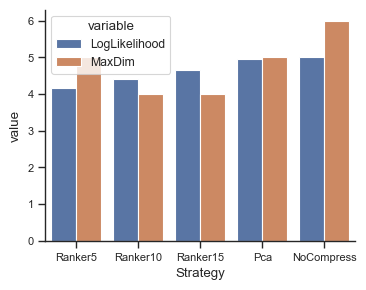

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("ggplot")
sns.set_theme(style="ticks", rc={"axes.spines.right": False, "axes.spines.top": False})
sns.set_context("paper")  # , font_scale=1.5, rc={"lines.linewidth": 1.5})
plt.rcParams["svg.fonttype"] = "none"
plt.rcParams["font.family"] = "Arial"
plt.rc("text", usetex=False)
plt.rc("xtick", labelsize="small")
plt.rc("ytick", labelsize="small")
plt.rc("axes", labelsize="medium")
plt.rc("pdf", use14corefonts=True)


fig, ax = plt.subplots(figsize=(4, 3))
sns.barplot(data=results_df[list(set(results_df.columns).difference({"Runtime", "Score", "Likelihood"}))].melt(["Strategy", "Restart"]),
            x="Strategy", y="value", hue="variable", ax=ax,
            order=["Ranker5", "Ranker10", "Ranker15", "Pca", "NoCompress"]
            )
fig.savefig("max_dim_likelihood.pdf", bbox_inches="tight")
fig.savefig("max_dim_likelihood.svg", bbox_inches="tight")


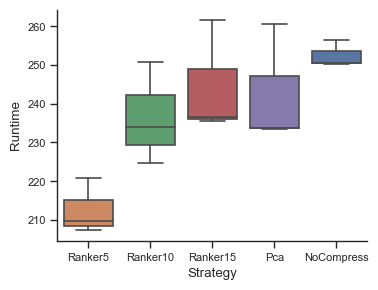

In [107]:
fig, ax = plt.subplots(figsize=(4, 3))

sns.boxplot(data=results_df, x="Strategy", y="Runtime", hue="Strategy", dodge=False, ax=ax,
                        order=["Ranker5", "Ranker10", "Ranker15", "Pca", "NoCompress"]
            )
ax.legend().set_visible(False)

fig.savefig("processing_runtime.pdf", bbox_inches="tight")
fig.savefig("processing_runtime.svg", bbox_inches="tight")
